"""
Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" посилання
Будьте уважні, значення в отриманій вами таблиці можуть відрізнятися від значень у таблиці за посиланням(див.документацію)
"""

In [169]:
import pandas as pd

url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tables_list = pd.read_html(url, attrs= {"class":"wikitable collapsible collapsed", "style":"text-align: right"}, thousands= '',decimal=',')
print("Number of parsed tables: ", len(tables_list))
table = tables_list[2]


Number of parsed tables:  26


Вивести перші рядки таблиці за допомогою методу head

In [170]:
print(table.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [166]:
print(table.shape)

(28, 9)


Замініть у таблиці значення "—" на значення NaN

In [171]:
import numpy as np

print(table.replace("—",np.NaN))


               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [172]:
print(table.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [267]:
table_tmp = table.replace("—",np.NaN)
table_tmp['2014'] = table_tmp['2014'].astype(float)
table_tmp['2019'] = table_tmp['2019'].astype(float)
print(table_tmp.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [264]:
table_tmp.isnull().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [289]:
table_tmp = table_tmp.drop(table_tmp.shape[0]-1)
print(table_tmp)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим 23.00 20.60 16.00 13.00  7.30 12.60 11.14  8.02
1           Вінницька 22.40 19.20 14.20 12.40  8.40 11.20 10.90  7.60
2           Волинська 24.70 25.00 17.90 15.30 11.20 14.80 14.10 10.10
3    Дніпропетровська 20.40 20.40 15.10 12.30  7.10 11.20 11.10  7.10
4            Донецька 27.10 21.40 14.00 10.90  6.10  9.80  8.20  8.02
5         Житомирська 26.10 22.30 15.90 12.90  8.90 12.20 12.00  7.90
6        Закарпатська 31.40 27.30 20.70 16.80 11.50 15.10 14.60 10.40
7          Запорізька 21.90 19.70 15.00 12.40  7.10 10.60 10.60  6.80
8   Івано-Франківська 24.30 24.80 18.20 15.50 10.30 12.40 12.20  8.80
9            Київська 20.40 18.90 15.60 12.30  7.30 12.20 12.10  8.00
10     Кіровоградська 21.60 17.10 14.50 12.60  7.90 11.00 10.80  6.80
11          Луганська 26.20 23.50 14.40 11.60  6.20  9.60  5.10  8.02
12          Львівська 23.40 24.00 17.10 14.00  9.10 11.90 11.90  8.70
13       Миколаївськ

Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [315]:
numeric_cols = table_tmp.select_dtypes(include=[np.number]).columns
table_tmp[numeric_cols] = table_tmp[numeric_cols].fillna(table_tmp[numeric_cols].mean())
pd.options.display.float_format = '{:.2f}'.format
print(table_tmp)


               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим 23.00 20.60 16.00 13.00  7.30 12.60 11.14  8.02
1           Вінницька 22.40 19.20 14.20 12.40  8.40 11.20 10.90  7.60
2           Волинська 24.70 25.00 17.90 15.30 11.20 14.80 14.10 10.10
3    Дніпропетровська 20.40 20.40 15.10 12.30  7.10 11.20 11.10  7.10
4            Донецька 27.10 21.40 14.00 10.90  6.10  9.80  8.20  8.02
5         Житомирська 26.10 22.30 15.90 12.90  8.90 12.20 12.00  7.90
6        Закарпатська 31.40 27.30 20.70 16.80 11.50 15.10 14.60 10.40
7          Запорізька 21.90 19.70 15.00 12.40  7.10 10.60 10.60  6.80
8   Івано-Франківська 24.30 24.80 18.20 15.50 10.30 12.40 12.20  8.80
9            Київська 20.40 18.90 15.60 12.30  7.30 12.20 12.10  8.00
10     Кіровоградська 21.60 17.10 14.50 12.60  7.90 11.00 10.80  6.80
11          Луганська 26.20 23.50 14.40 11.60  6.20  9.60  5.10  8.02
12          Львівська 23.40 24.00 17.10 14.00  9.10 11.90 11.90  8.70
13       Миколаївськ

Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [313]:
# для кейсу більше середнього в 2019
table_tmp[table_tmp['2019']>table_tmp['2019'].mean()]
# для кейсу більше середнього взагалі
# table_tmp[table_tmp['2019']>table_tmp[numeric_cols].mean().mean()]



,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.00,20.60,16.00,13.00,7.30,12.60,11.14,8.02
2,Волинська,24.70,25.00,17.90,15.30,11.20,14.80,14.10,10.10
4,Донецька,27.10,21.40,14.00,10.90,6.10,9.80,8.20,8.02
6,Закарпатська,31.40,27.30,20.70,16.80,11.50,15.10,14.60,10.40
8,Івано-Франківська,24.30,24.80,18.20,15.50,10.30,12.40,12.20,8.80
11,Луганська,26.20,23.50,14.40,11.60,6.20,9.60,5.10,8.02
12,Львівська,23.40,24.00,17.10,14.00,9.10,11.90,11.90,8.70
14,Одеська,24.10,19.20,14.80,12.60,8.00,12.70,12.30,8.80
16,Рівненська,26.90,26.70,19.30,15.80,11.80,15.90,14.80,10.70
20,Херсонська,20.80,21.40,16.60,14.30,8.50,11.70,11.50,8.10


У якому регіоні була найвища народжуваність у 2014 році?

In [306]:
table_tmp[table_tmp['2014']==table_tmp['2014'].max()]

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
16,Рівненська,26.90,26.70,19.30,15.80,11.80,15.90,14.80,10.70


Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

Text(0.5, 1.0, 'Коефіцієнти 2019р')

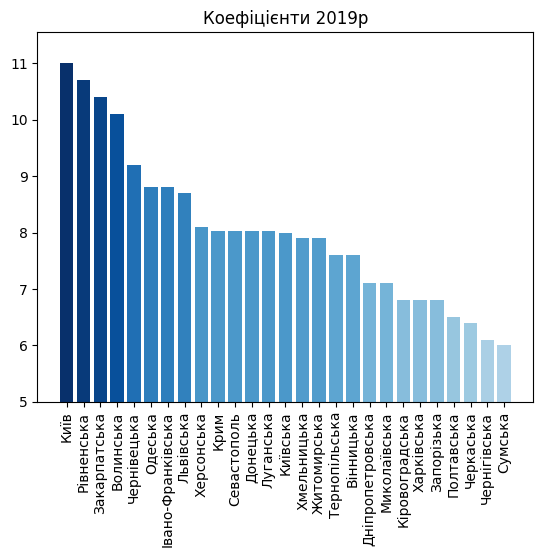

In [364]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
table_tmp=table_tmp.sort_values(by=['2019'],ascending=False)
regions = table_tmp['Регіон']
birth_koef = table_tmp['2019']

ax = plt.axes()
ax.set_facecolor('White')   

norm = plt.Normalize(min(birth_koef)*0.6, max(birth_koef))
colors = plt.cm.Blues(norm(birth_koef))

bar = plt.bar(regions,birth_koef, color = colors)
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_locator(MultipleLocator(1))
plt.ylim(5)
plt.title("Коефіцієнти 2019р")
plt.show()


